In [65]:
# Importing Dependencies
import pandas as pd
import re

# **EDA Analysis**
## Ticket 1.1: Final Target Classification Trials
### Data Ingestion


In [66]:
# Load the data
job_postings = pd.read_csv('../../../data/job_postings.csv')

display("Job Postings Dataset:")
display(job_postings.head())

'Job Postings Dataset:'

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


### **Target Jobs Classification Regex**

In [67]:
# target job title regex list
target_job_titles_regex = {
    "MLOps Engineer": r"(?i)(MLOps|Machine Learning Operations|Machine Learning Infrastructure Engineer|ML Infrastructure|ML Platform|ML Systems|ML Platform Engineer|AIML Ops Engineer|Machine Learning Software Developer)\w*[-\s]?",

    "Machine Learning Engineer": r"(?i)(Machine Learning Engineer|ML Engineer|Machine Learning Engineering|ML Developer|Machine Learning Software Engineer|AIML Engineer|AIML Data Scientist|AI Data Science Lead)\w*[-\s]?",

    "Data Architect": r"(?i)(Data Architect|Senior Data Architect|Cloud Data Architect|Big Data Architect|Enterprise Data Architect|Principal Data Architect|Lead Data Architect|Data Warehouse Architect|Data Architecture|Data Lake Architect|Data Streaming Architect)\w*[-\s]?",

    "Database Engineer / Administrator": r"(?i)(Database|Database Architect|DBA\b|Cloud Database|Azure Database|AWS Database|Databases|GCP Database|PostgreSQL|NoSQL|Oracle Database Engineer)\w*[-\s]?",

    "Data Engineer": r"(?i)(Data Engineer|Senior Data Engineer|Lead Data Engineer|Big Data Engineer|Data Engineering|Data Engineering Manager|Data Engineering Architect|Data Pipeline Engineer|Big Data Developer|Data Engineers|Data Integrations|Data Infrastructure|ETL Developer)\w*[-\s]?",

    "Data Governance & Security": r"(?i)(Data Governance|Data Privacy|Data Steward|Data Protection|Data Security|Master Data Management|Data Governance Manager|Data Compliance|Data Lifecycle Manager)\w*[-\s]?",

    "Data Operations & Management": r"(?i)(Data Manager|Enterprise Data Manager|Data Operations|Data Operations Manager|Data Operations Analyst|Data Management Engineer|Data Strategy Manager|Data Solution Architect|Data Deployment|Data Conversion|Data Replication Engineer|DevOps Engineer|Distributed Systems|Storage)\w*[-\s]?",

    "Data Modeling & Warehousing": r"(?i)(Data Modeling|Data Warehouse|Big Data Developer|Data Warehouse Architect|Cloud Datawarehouse|Data Platform Developer)\w*[-\s]?",

    "Data Specialist": r"(?i)(Data Specialist|Data Processing|Data Consultant|Data Quality Manager|Data Coordinator|Data Entry Specialist)\w*[-\s]?",

    "Data Scientist": r"(?i)(Data Scientist|Data Scientists|Data Science Engineer|Data Science Manager|Data Science Analyst|Data Science Practitioner|Customer Data Scientist)\w*[-\s]?",

    "Data Analyst": r"(?i)(Data Analyst|Data Analysts|Financial Data Analyst|Business Intelligence|BI Analyst|Data Business Analyst|Data Insights Analyst)\w*[-\s]?",

    "Software & Platform Engineering": r"(?i)(Software Engineer|Software Engineering|Software Developer|Software Engineer Data Science|Software Engineer Data Platforms|Platform Engineer|Application Developer|Backend Engineer|Systems Developer)\w*[-\s]?",

    "Cloud & Infrastructure Engineering": r"(?i)(Cloud Data|Cloud Data Architect|Azure Data|AWS Data|Azure Databricks|AWS Databricks|Cloud Engineer|Cloud Platform Engineer|Infrastructure Engineer|Datacenter Technician|Datacenter Engineer|Datacenter Network Engineer|Datacenter Engineering|Site Reliability Engineer|SRE)\w*[-\s]?",

    "Risk & Compliance Analytics": r"(?i)(Risk Analyst|AML\b|BSA|Risk Modeling|Financial Analyst|Hedge Fund|Data Loss Prevention|DLP)\w*[-\s]?"
}


### **Classification Function**

In [68]:
# Function to Classify Job Titles
def classify(job_title, keywords_list=target_job_titles_regex):
    for industry, keyword in keywords_list.items():
        match = re.search(keyword, str(job_title))
        if match:
            keyword = re.sub(r'[^a-zA-Z\s]', '', match.group()).strip().title()   # using match.group() to return the actual keyword that was matched rather than the regex pattern
            return industry, keyword              
    return "unclassified", "unclassified"


In [69]:
# Copy Dataframe and Execute the classification function
structured_job_titles = job_postings.copy()
structured_job_titles['job_classification'], structured_job_titles['job_keyword'] = zip(*structured_job_titles['job_title'].apply(classify))

# Check the results
structured_job_titles.head(10)


,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_classification,job_keyword
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,Machine Learning Engineer,Machine Learning Engineer
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,Software & Platform Engineering,Software Engineer
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,Data Modeling & Warehousing,Data Warehouse
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,Data Modeling & Warehousing,Data Warehouse
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,Data Engineer,Lead Data Engineer
5,https://www.linkedin.com/jobs/view/senior-data...,2024-01-21 07:14:11.378097+00,Finished NER,t,t,f,Senior Data Engineer,University of Chicago,"Chicago, IL",2024-01-14,East Chicago,United States,Data Base Administrator,Mid senior,Onsite,Data Engineer,Senior Data Engineer
6,https://www.linkedin.com/jobs/view/manager-cyb...,2024-01-21 07:14:09.631476+00,Finished NER,t,t,f,"Manager, Cyber Risk & Analysis (Machine Learning)",Jobs for Humanity,"Boston, MA",2024-01-16,Beverly,United States,Manager Reports Analysis,Mid senior,Onsite,unclassified,unclassified
7,https://www.linkedin.com/jobs/view/principal-a...,2024-01-21 07:39:58.478064+00,Finished NER,t,t,f,"Principal Associate, Data Loss Prevention (DLP...",Jobs for Humanity,"Scranton, PA",2024-01-14,Nanticoke,United States,Architect,Mid senior,Onsite,Risk & Compliance Analytics,Data Loss Prevention
8,https://www.linkedin.com/jobs/view/senior-fina...,2024-01-21 07:14:50.991803+00,Finished NER,t,t,f,Senior Financial Data Analyst,The Walt Disney Company,"Lake Buena Vista, FL",2024-01-15,Avondale,United States,Budget Officer,Mid senior,Onsite,Data Analyst,Financial Data Analyst
9,https://www.linkedin.com/jobs/view/machine-lea...,2024-01-21 07:40:40.017291+00,Finished NER,t,t,f,Machine Learning Infrastructure Engineer,L&T Technology Services,"Sunnyvale, CA",2024-01-14,Redwood City,United States,Test Fixture Designer,Mid senior,Onsite,MLOps Engineer,Machine Learning Infrastructure Engineer


In [70]:
# count the number of each keyword occurrences
target_job_counts = pd.DataFrame(structured_job_titles['job_keyword'].value_counts()).reset_index().set_index('job_keyword')

# display the counts
print("Keyword Counts:")
target_job_counts

Keyword Counts:


,count
job_keyword,
unclassified,4339
Data Analyst,1820
Data Scientist,799
Data Engineer,770
Database,708
...,...
Data Deployment,1
Data Scientists,1
Data Science Practitioner,1


In [71]:
# count the number of each job classification
target_job_classification_counts = pd.DataFrame(structured_job_titles['job_classification'].value_counts()).reset_index().set_index('job_classification')

# display the counts
display(target_job_classification_counts)

,count
job_classification,
unclassified,4339
Data Analyst,1920
Data Engineer,1791
Data Scientist,849
Database Engineer / Administrator,749
Machine Learning Engineer,506
Data Architect,370
Data Governance & Security,340
Risk & Compliance Analytics,275


### **Check Group**

In [72]:
# check group
job_check = 'Cloud & Infrastructure Engineering'
pd.DataFrame(structured_job_titles[structured_job_titles['job_classification'] == job_check])

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_classification,job_keyword
418,https://www.linkedin.com/jobs/view/datadog-clo...,2024-01-19 14:08:54.13512+00,Finished NER,t,t,f,Datadog Cloud Engineer Denver Colorado (3 days...,"Anveta, Inc","Denver, CO",2024-01-14,Colorado,United States,Computer Systems Hardware Analyst,Mid senior,Onsite,Cloud & Infrastructure Engineering,Cloud Engineer
686,https://www.linkedin.com/jobs/view/principal-s...,2024-01-19 17:02:42.718423+00,Finished NER,t,t,f,"Principal Site Reliability Engineer, Datastore...",ThousandEyes (part of Cisco),"San Francisco, CA",2024-01-14,Novato,United States,Reliability Engineer,Mid senior,Onsite,Cloud & Infrastructure Engineering,Site Reliability Engineer
849,https://uk.linkedin.com/jobs/view/manager-site...,2024-01-19 18:49:14.510383+00,Finished NER,t,t,f,Manager Site Reliability Engineering (SRE) - K...,Gaia Labs LLC,"Southampton, England, United Kingdom",2024-01-14,South Hampshire,United Kingdom,Starter,Mid senior,Onsite,Cloud & Infrastructure Engineering,Site Reliability Engineering
1069,https://uk.linkedin.com/jobs/view/senior-backe...,2024-01-19 21:27:04.594381+00,Finished NER,t,t,f,Senior Backend and Cloud Engineer - Machine Le...,Scandit,"Bristol, England, United Kingdom",2024-01-14,Newport,United Kingdom,Value Engineer,Mid senior,Onsite,Cloud & Infrastructure Engineering,Cloud Engineer
1215,https://www.linkedin.com/jobs/view/sr-site-rel...,2024-01-19 23:13:49.155128+00,Finished NER,t,t,f,Sr. Site Reliability Engineer (Application Sof...,SpaceX,"Hawthorne, CA",2024-01-14,Malibu,United States,Reliability Engineer,Mid senior,Onsite,Cloud & Infrastructure Engineering,Site Reliability Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11506,https://www.linkedin.com/jobs/view/datacenter-...,2024-01-21 02:32:47.751331+00,Finished NER,t,t,f,"Datacenter Engineer, Infrastructure Network En...",Tesla,"Sacramento, CA",2024-01-14,Roseville,United States,Value Engineer,Mid senior,Onsite,Cloud & Infrastructure Engineering,Datacenter Engineer
11527,https://ca.linkedin.com/jobs/view/solution-arc...,2024-01-21 02:46:01.83432+00,Finished NER,t,t,f,Solution Architect – Azure Data Integration,Torinit Technologies,"Toronto, Ontario, Canada",2024-01-14,Ontario,Canada,Change Person,Mid senior,Onsite,Cloud & Infrastructure Engineering,Azure Data
11592,https://www.linkedin.com/jobs/view/cloud-data-...,2024-01-21 03:18:41.401982+00,Finished NER,t,t,f,Cloud Data Platform Administrator,Adtalem Global Education,"Chicago, IL",2024-01-14,La Grange,United States,Data Base Administrator,Associate,Onsite,Cloud & Infrastructure Engineering,Cloud Data
11871,https://uk.linkedin.com/jobs/view/senior-backe...,2024-01-21 06:09:24.081787+00,Finished NER,t,t,f,Senior Backend and Cloud Engineer - Machine Le...,Scandit,"Swansea, Wales, United Kingdom",2024-01-14,Swansea,United Kingdom,Agricultural-Research Engineer,Mid senior,Onsite,Cloud & Infrastructure Engineering,Cloud Engineer


### **Reflection: Successfully Standardizing Job Titles into Technical Data Science Roles**  

After a lot of trial and error, I’ve finally managed to **group and integrate varied job title keywords** that I had previously grouped into **14 distinct technical data science roles**. This was a huge step forward, as it now technically outlines the 14 job titles that will be used for the final MVP visualizations. The selection was made quite simply by looking at which careers are most representative of the data science industry thus requiring the title to have a certain number of job listings and title generality. To that end I attempted to group keywords by Discipline or Job Role and Career Growth Opportunies together to ensure that each category has at least **50 or more job listings**, making the visualizations much more meaningful.  

Though the process wasn’t straightforward—by using a **hierarchical keyword-matching approach**, I was able to **sort job titles more accurately and move certain specialized roles** into their appropriate categories.

---

### **Final EDA Steps: Experience & Seniority Classification**  

With **job titles now standardized**, the next and final step in this **Exploratory Data Analysis (EDA) ticker 1.1** is to classify **experience and seniority levels**. Just like with job titles, this will involve:  

- Spotting **patterns in experience-related keywords** (e.g., *Junior, Mid, Senior, Lead, Principal*).  
- Making sure **job levels are assigned correctly** to maintain career progression.  
- Avoiding **misclassification**, especially when job titles contain overlapping terms that could place them in the wrong category.  

Once this step is complete, the dataset job title break down will be in **its cleanest, most structured form**, setting us up for **clear and reliable job market insight categorizations** in the final visualizations.  
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>


### **Seniority Level Classification Regex**

In [73]:
# seniority level regex list
seniority_levels_regex = {
    # 🔹 Principal / Staff-Level Roles (Must Be Checked First)
    "Principal / Staff-Level": r"(?i)(Principal|Staff|Sr[-\s]?Staff|Distinguished|Fellow|Master|L4|Level 4|Chief[-\s]?Architect|Chief[-\s]?Scientist)\w*[-\s]?",

    # 🔹 Lead / Supervisor Roles (Checked Before Senior)
    "Lead": r"(?i)(Lead|Tech[-\s]?Lead|Team[-\s]?Lead|Supervisor|Group[-\s]?Lead|Project[-\s]?Lead|Engineering[-\s]?Lead|Squad[-\s]?Lead|Chapter[-\s]?Lead|Manager|Head[-\s]?of[-\s]?Team)\w*[-\s]?",

    # 🔹 Senior-Level Roles (Checked Before Mid-Level)
    "Senior-Level": r"(?i)(Senior|Sr\.?|SNR|SEN|L3|Level 3|Expert|Specialist|Advanced|Seasoned|Experienced)\w*[-\s]?",

    # 🔹 Mid-Level Roles (Checked Before Junior)
    "Mid-Level": r"(?i)(Mid[-\s]?Level|Intermediate|Mid|L2|Level 2|Professional|Regular)\w*[-\s]?",

    # 🔹 Entry-Level / Junior Roles (Checked After Principal & Senior)
    "Entry-Level / Junior": r"(?i)(Junior|Jr\.?|Entry[-\s]?Level|Associate|Graduate|Trainee|Fresher|New Grad|Early[-\s]?Career|L1|Level 1)\w*[-\s]?",

    # 🔹 Intern / Internship Roles (Checked Last)
    "Intern": r"(?i)(Intern|Internship|Co[-\s]?Op|Apprentice|Trainee)\w*[-\s]?",

    # 🔹 Director / Executive Roles (Checked Last for Highest Priority)
    "Director / Executive": r"(?i)(Director|Head|VP|Vice[-\s]?President|CIO|CTO|CISO|CEO|Chief|Executive|C[-]?Level|Managing[-\s]?Director|Global[-\s]?Head|President|Founder|Partner)\w*[-\s]?"
}


### **Seniority Level Classification Function**

In [74]:
# Create single use function to classify seniority level
def classify_seniority_level(job_title):
    return classify(job_title, seniority_levels_regex)

In [75]:
# Execute the classification function on the copied dataframe
structured_job_titles['seniority_level'], structured_job_titles['seniority_level_keyword'] = zip(*structured_job_titles['job_title'].apply(classify_seniority_level))

# Check the results
structured_job_titles.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_classification,job_keyword,seniority_level,seniority_level_keyword
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,Machine Learning Engineer,Machine Learning Engineer,Senior-Level,Senior
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,Software & Platform Engineering,Software Engineer,Principal / Staff-Level,Principal
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,Data Modeling & Warehousing,Data Warehouse,Senior-Level,Senior
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,Data Modeling & Warehousing,Data Warehouse,Senior-Level,Senior
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,Data Engineer,Lead Data Engineer,Lead,Lead


### **Classify the Unclassified Seniority Titles**

In [76]:
# Create a For Loop and If Conditional to classify the unclassified seniority titles
for index, row in structured_job_titles.iterrows():
    if row['seniority_level'] == 'unclassified':
        if row['job_keyword'] == 'Data Analyst':
            structured_job_titles.loc[index, 'seniority_level'] = "Entry-Level / Junior"
        elif row['job_keyword'] == 'Data Scientist' or row['job_keyword'] == 'Data Engineer' or row['job_keyword'] == 'Data Engineering' or row['job_keyword'] == 'MLOps Engineer' or row['job_keyword'] == 'Business Intelligence' or row['job_keyword'] == 'Data Coordinator':
            structured_job_titles.loc[index, 'seniority_level'] = "Mid-Level"
        elif row['job_keyword'] == 'Data Architect' or row['job_keyword'] == 'Data Warehouse':
            structured_job_titles.loc[index, 'seniority_level'] = "Senior-Level"



In [77]:
# Dropping rows with no job classification
structured_job_titles = structured_job_titles[structured_job_titles['job_classification'] != 'unclassified']

# Show unclassified seniority titles
unclassified_seniority = structured_job_titles[structured_job_titles['seniority_level'] == 'unclassified']
unclassified_seniority_df = pd.DataFrame(unclassified_seniority[['job_title', 'job_classification', 'job_keyword', 'seniority_level', 'seniority_level_keyword']])
unclassified_seniority_df


,job_title,job_classification,job_keyword,seniority_level,seniority_level_keyword
9,Machine Learning Infrastructure Engineer,MLOps Engineer,Machine Learning Infrastructure Engineer,unclassified,unclassified
81,Clinical Data Steward,Data Governance & Security,Data Steward,unclassified,unclassified
107,Database Engineer,Database Engineer / Administrator,Database,unclassified,unclassified
121,Data Security Analyst,Data Governance & Security,Data Security,unclassified,unclassified
170,Machine Learning Software Developer (Software ...,MLOps Engineer,Machine Learning Software Developer,unclassified,unclassified
...,...,...,...,...,...
12128,ML Data Science Engineer,Data Scientist,Data Science Engineer,unclassified,unclassified
12147,"ML Infrastructure Engineer, Autopilot AI & Tes...",MLOps Engineer,Ml Infrastructure,unclassified,unclassified
12158,"Computational Research Scientist III, Physiolo...",Data Modeling & Warehousing,Data Modeling,unclassified,unclassified
12176,Database Architect( TS/SCI),Database Engineer / Administrator,Database,unclassified,unclassified


### **Check Group**

In [78]:
# check group
job_check = 'Cloud & Infrastructure Engineering'
pd.DataFrame(structured_job_titles[structured_job_titles['job_classification'] == job_check].head())

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_classification,job_keyword,seniority_level,seniority_level_keyword
418,https://www.linkedin.com/jobs/view/datadog-clo...,2024-01-19 14:08:54.13512+00,Finished NER,t,t,f,Datadog Cloud Engineer Denver Colorado (3 days...,"Anveta, Inc","Denver, CO",2024-01-14,Colorado,United States,Computer Systems Hardware Analyst,Mid senior,Onsite,Cloud & Infrastructure Engineering,Cloud Engineer,unclassified,unclassified
686,https://www.linkedin.com/jobs/view/principal-s...,2024-01-19 17:02:42.718423+00,Finished NER,t,t,f,"Principal Site Reliability Engineer, Datastore...",ThousandEyes (part of Cisco),"San Francisco, CA",2024-01-14,Novato,United States,Reliability Engineer,Mid senior,Onsite,Cloud & Infrastructure Engineering,Site Reliability Engineer,Principal / Staff-Level,Principal
849,https://uk.linkedin.com/jobs/view/manager-site...,2024-01-19 18:49:14.510383+00,Finished NER,t,t,f,Manager Site Reliability Engineering (SRE) - K...,Gaia Labs LLC,"Southampton, England, United Kingdom",2024-01-14,South Hampshire,United Kingdom,Starter,Mid senior,Onsite,Cloud & Infrastructure Engineering,Site Reliability Engineering,Lead,Manager
1069,https://uk.linkedin.com/jobs/view/senior-backe...,2024-01-19 21:27:04.594381+00,Finished NER,t,t,f,Senior Backend and Cloud Engineer - Machine Le...,Scandit,"Bristol, England, United Kingdom",2024-01-14,Newport,United Kingdom,Value Engineer,Mid senior,Onsite,Cloud & Infrastructure Engineering,Cloud Engineer,Senior-Level,Senior
1215,https://www.linkedin.com/jobs/view/sr-site-rel...,2024-01-19 23:13:49.155128+00,Finished NER,t,t,f,Sr. Site Reliability Engineer (Application Sof...,SpaceX,"Hawthorne, CA",2024-01-14,Malibu,United States,Reliability Engineer,Mid senior,Onsite,Cloud & Infrastructure Engineering,Site Reliability Engineer,Senior-Level,Sr


### **Drop unclassified rows**



In [79]:
# Dropping rows with no job classification
structured_job_titles = structured_job_titles[structured_job_titles['job_classification'] != 'unclassified']

# check results
structured_job_titles


,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_classification,job_keyword,seniority_level,seniority_level_keyword
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite,Machine Learning Engineer,Machine Learning Engineer,Senior-Level,Senior
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite,Software & Platform Engineering,Software Engineer,Principal / Staff-Level,Principal
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite,Data Modeling & Warehousing,Data Warehouse,Senior-Level,Senior
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite,Data Modeling & Warehousing,Data Warehouse,Senior-Level,Senior
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite,Data Engineer,Lead Data Engineer,Lead,Lead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12209,https://www.linkedin.com/jobs/view/data-archit...,2024-01-21 08:08:07.523737+00,Finished NER,t,t,f,Data Architect,General Dynamics Information Technology,"St Louis, MO",2024-01-14,Collinsville,United States,Interior Designer,Mid senior,Onsite,Data Architect,Data Architect,Senior-Level,unclassified
12211,https://ca.linkedin.com/jobs/view/senior-data-...,2024-01-20 05:10:03.58781+00,Finished NER,t,t,f,Senior Data Insights Analyst,CARFAX Canada,"London, Ontario, Canada",2024-01-14,London,Canada,Data Entry Clerk,Mid senior,Onsite,Data Analyst,Data Insights Analyst,Senior-Level,Senior
12213,https://www.linkedin.com/jobs/view/corporate-a...,2024-01-19 15:10:41.177008+00,Finished NER,t,t,f,Corporate AML Alert Investigation Specialist,"Glacier Bancorp, Inc.","Kalispell, MT",2024-01-14,Montana,United States,Teller,Mid senior,Onsite,Risk & Compliance Analytics,Aml,Senior-Level,Specialist
12214,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:20:19.036168+00,Finished NER,t,t,f,Senior Data Scientist,Highnote,"San Francisco, CA",2024-01-16,San Rafael,United States,Mathematician,Mid senior,Onsite,Data Scientist,Data Scientist,Senior-Level,Senior


### **Final Reflection: Job Title & Experience Level Classification**  

After extensive iterations and refinement, I’ve successfully classified **job titles and experience levels**, marking the completion of **Ticket 1.1 – EDA**. The final dataset consists of **5,079 classified job listings**, a significant improvement from the original **12,000+ entries**, effectively filtering out ambiguous or highly niche job titles that lacked meaningful representation.  

I’m **proud of the classification rate**, especially given the complexity of long-form job titles and the overlapping nature of technical roles. By structuring job titles using a **hierarchical keyword-matching approach**, I was able to ensure that roles were grouped meaningfully while **minimizing misclassification and cross-contamination**. The addition of **seniority level classification** further enhances the dataset, allowing for better segmentation by career progression.  

However, if I had more time, there are several areas I’d consider improving:  
- **Handling slight misspellings or inconsistencies** in job titles, which may have led to some relevant listings being missed.  
- **Exploring fuzzy matching techniques** to capture more variations in long-form job titles.  
- **Refining the seniority classification process** to better differentiate between ambiguous roles (e.g., distinguishing between "Lead" and "Senior" when both appear in the same title).  
- **Optimizing regex rules further** to ensure even more precise or better blanketed classification, particularly for niche roles that may still be underrepresented.  

While this step concludes my **EDA for job title and experience level classification**, the next step is integrating this process into the **main data cleaning pipeline**, ensuring that future job postings are automatically categorized with minimal manual intervention. This structured approach lays the foundation for **more accurate and meaningful visualizations**, setting up the project for deeper insights into data science career paths.


**SKILL EXTRACTION**
## Merging skills and job classifications to find the top skills per classification.


In [80]:

job_skills = pd.read_csv('../../../data/job_skills.csv')

# 1️⃣ Merge job_skills DataFrame with structured_job_titles on 'job_link' (left merge)
merged_df = pd.merge(structured_job_titles, job_skills[['job_link', 'job_skills']], 
                     on='job_link', how='left')

# 2️⃣ Convert 'job_skills' from a string to a list of skills (by splitting on commas)
merged_df['job_skills'] = merged_df['job_skills'].str.split(", ")

# 3️⃣ Explode the 'job_skills' column so that each skill appears in a separate row
merged_df = merged_df.explode('job_skills')

# 4️⃣ Remove NaN and empty values from 'job_skills'
merged_df = merged_df.dropna(subset=['job_skills'])
merged_df = merged_df[merged_df['job_skills'] != '']

# 5️⃣ Group by 'job_classification' and 'job_skills' to count occurrences of each skill across all jobs in the same classification
skill_counts = merged_df.groupby(['job_classification', 'job_skills']).size().reset_index(name='skill_count')

# 6️⃣ Sort by 'job_classification' and 'skill_count' to find the most frequent skills
skill_counts_sorted = skill_counts.sort_values(by=['job_classification', 'skill_count'], ascending=[True, False])

# 7️⃣ For each job classification, select the top 20 most frequent skills
top_skills_per_classification = skill_counts_sorted.groupby('job_classification').head(20)

# 8️⃣ Print or view the top skills for each classification (only top 20)
top_skills_per_classification




,job_classification,job_skills,skill_count
1114,Cloud & Infrastructure Engineering,Python,41
823,Cloud & Infrastructure Engineering,Kubernetes,24
1468,Cloud & Infrastructure Engineering,Troubleshooting,20
543,Cloud & Infrastructure Engineering,Docker,18
33,Cloud & Infrastructure Engineering,AWS,17
...,...,...,...
62975,Software & Platform Engineering,Azure,28
63264,Software & Platform Engineering,Computer Science,28
63853,Software & Platform Engineering,Go,27
64301,Software & Platform Engineering,NoSQL,27


The process involves merging the job_skills data with structured_job_titles using a common identifier (job_link). Once merged, the job_skills column, which contains comma-separated strings of skills, is split into individual lists. The data is then "exploded" to create separate rows for each skill, allowing us to count how many times each skill appears across all job postings within a specific job classification. By grouping the data by both job_classification and job_skills, we count the occurrences of each skill, sort them by frequency, and select the top 20 most frequent skills for each job classification. The result is a list of the top 20 skills per classification, which can be further visualized in a pivot table showing skill counts across job categories. Note we had to conver the skills data type for a string to a list (so we can explode the comma-separated lists).

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


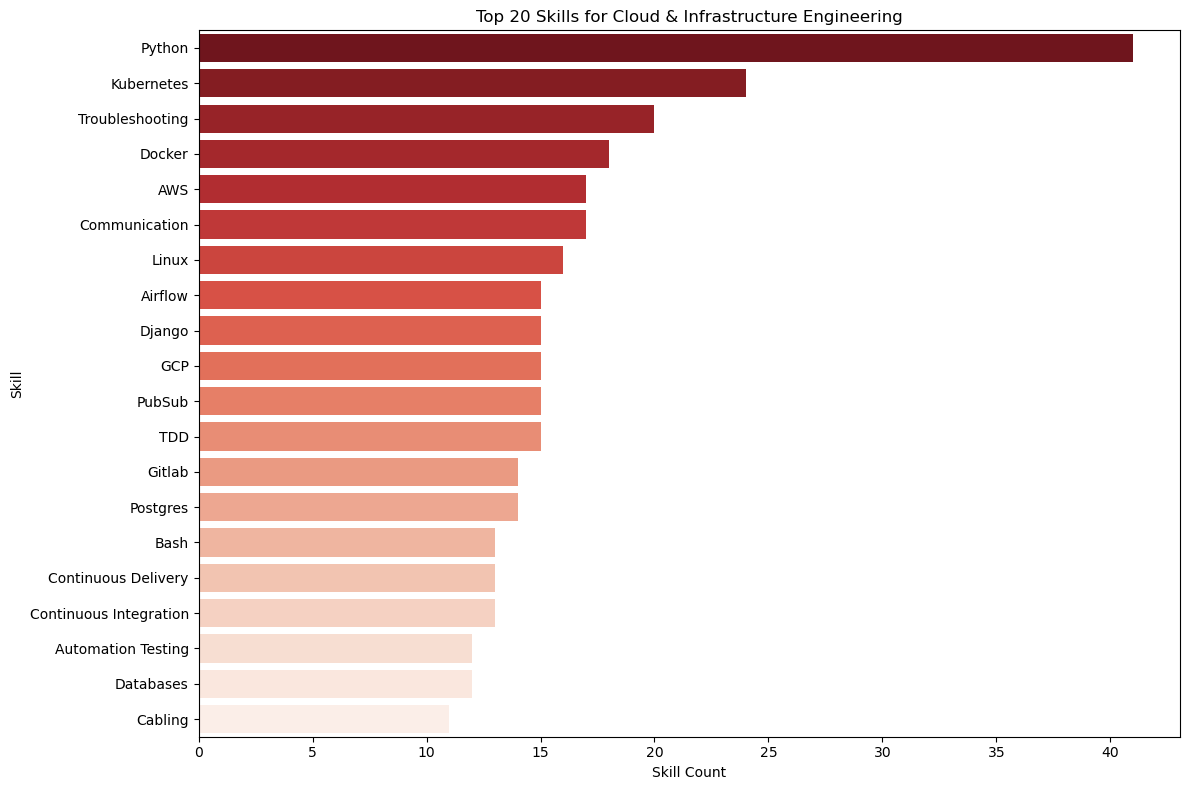

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


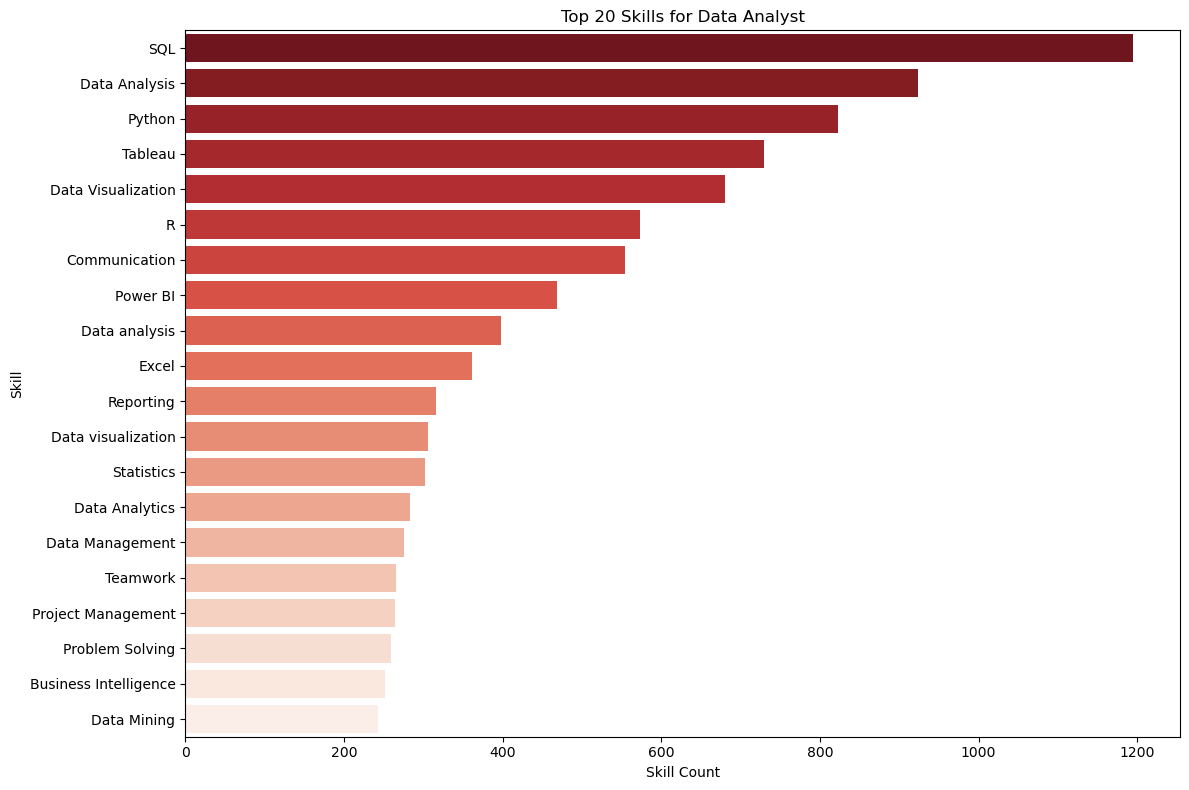

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


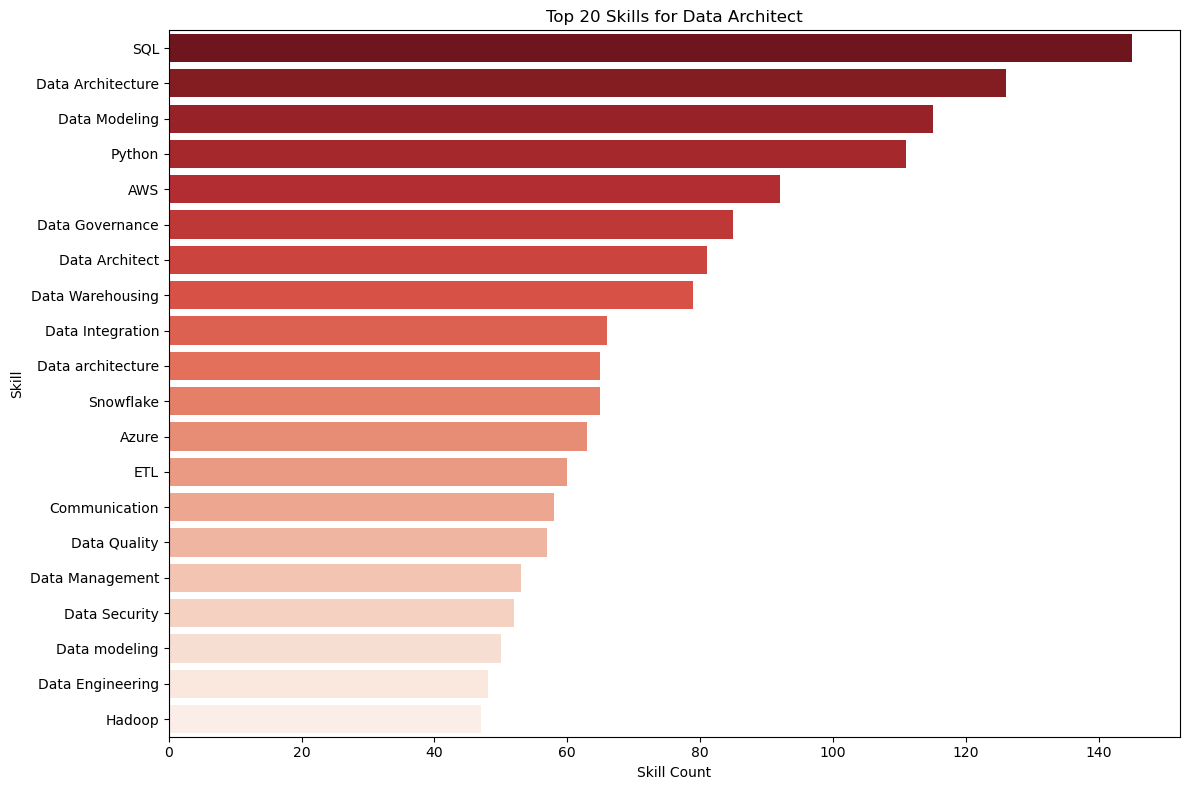

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


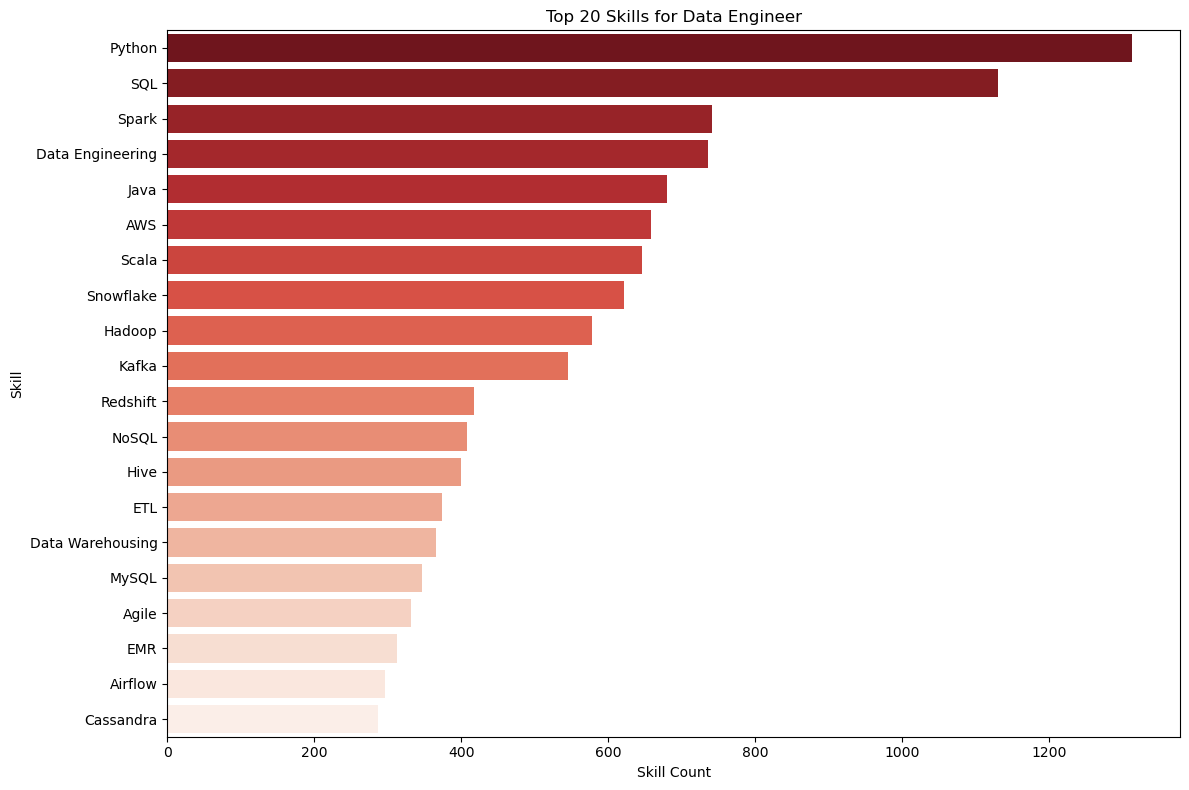

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


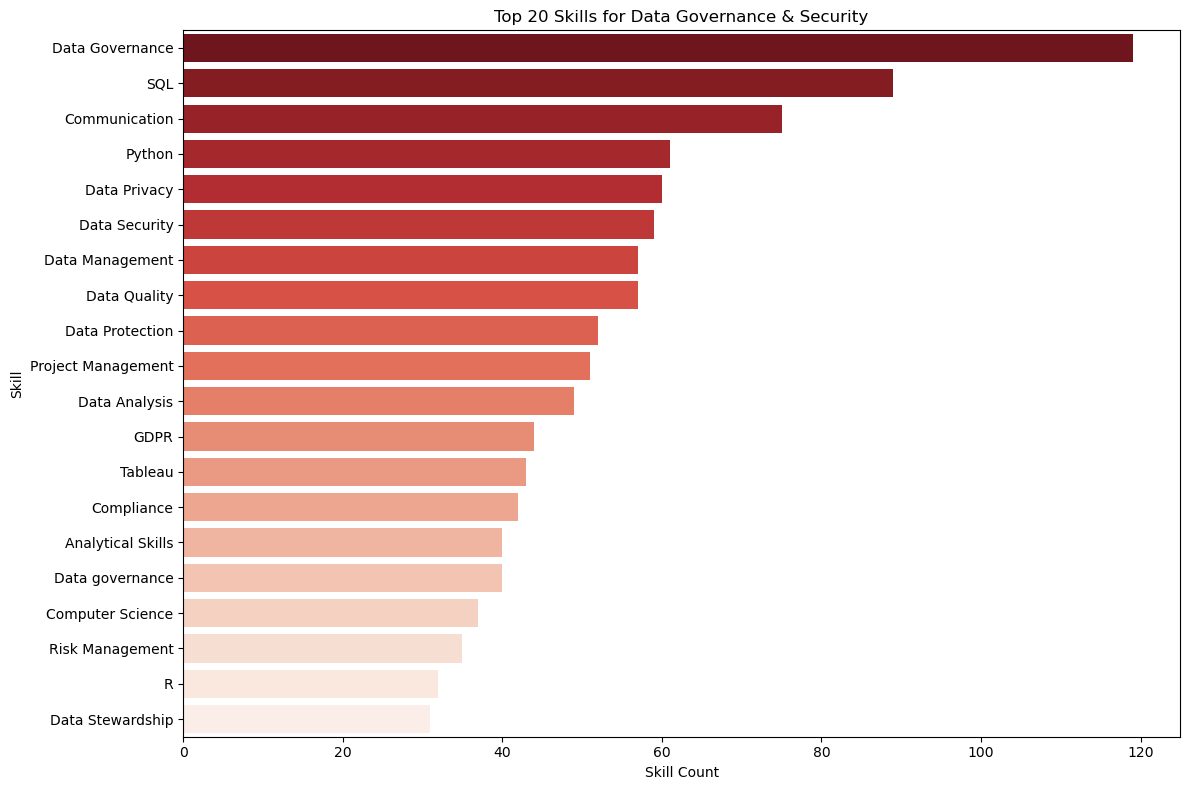

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


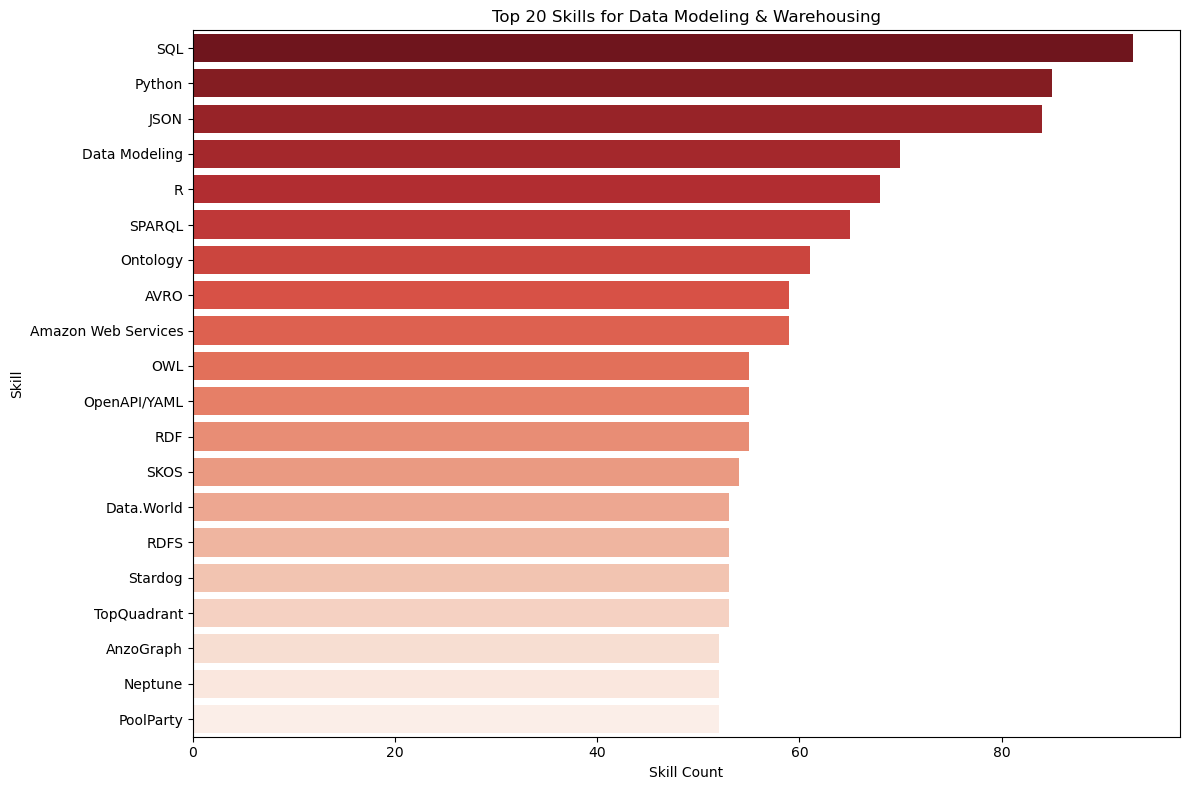

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


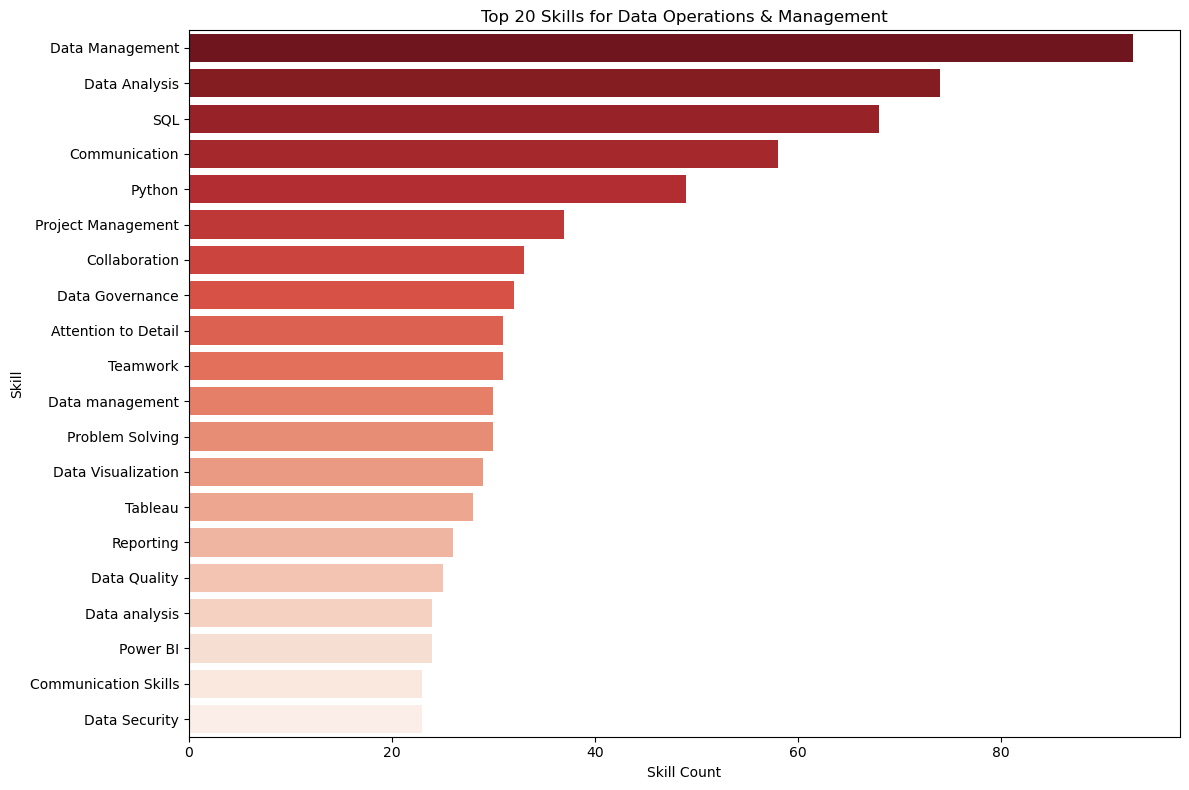

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


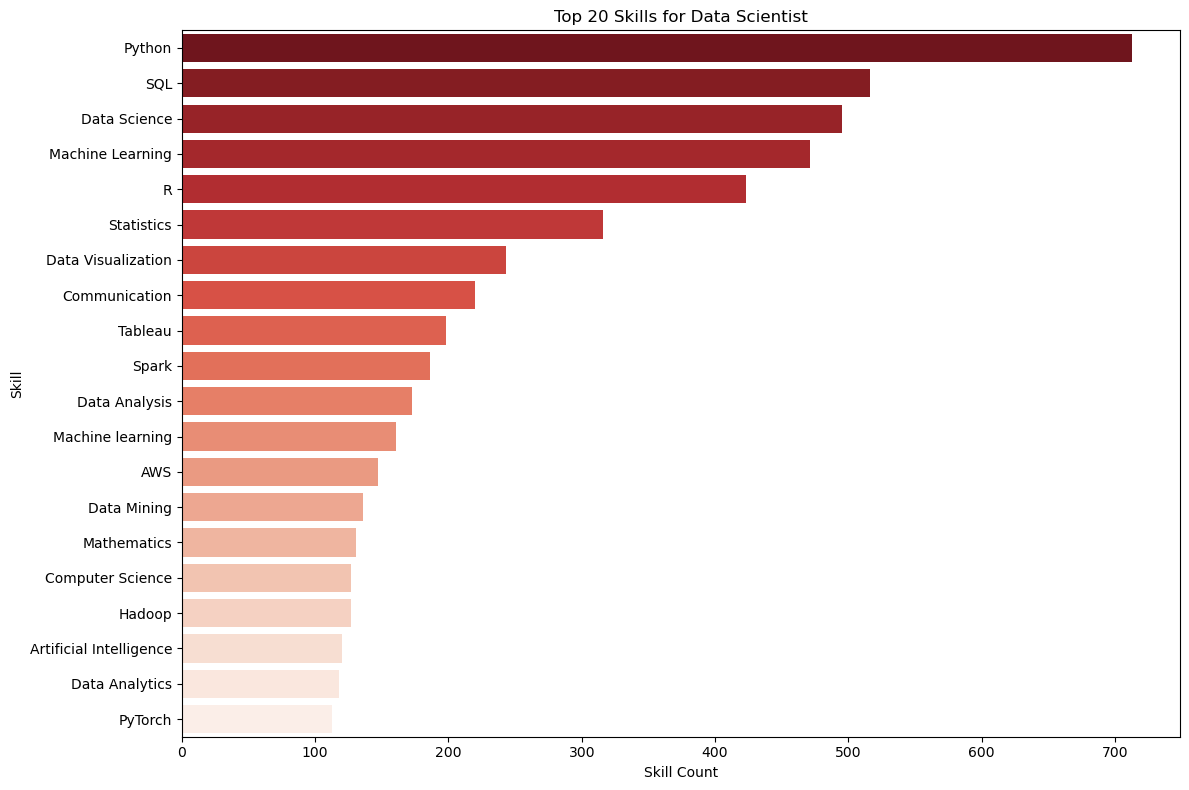

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


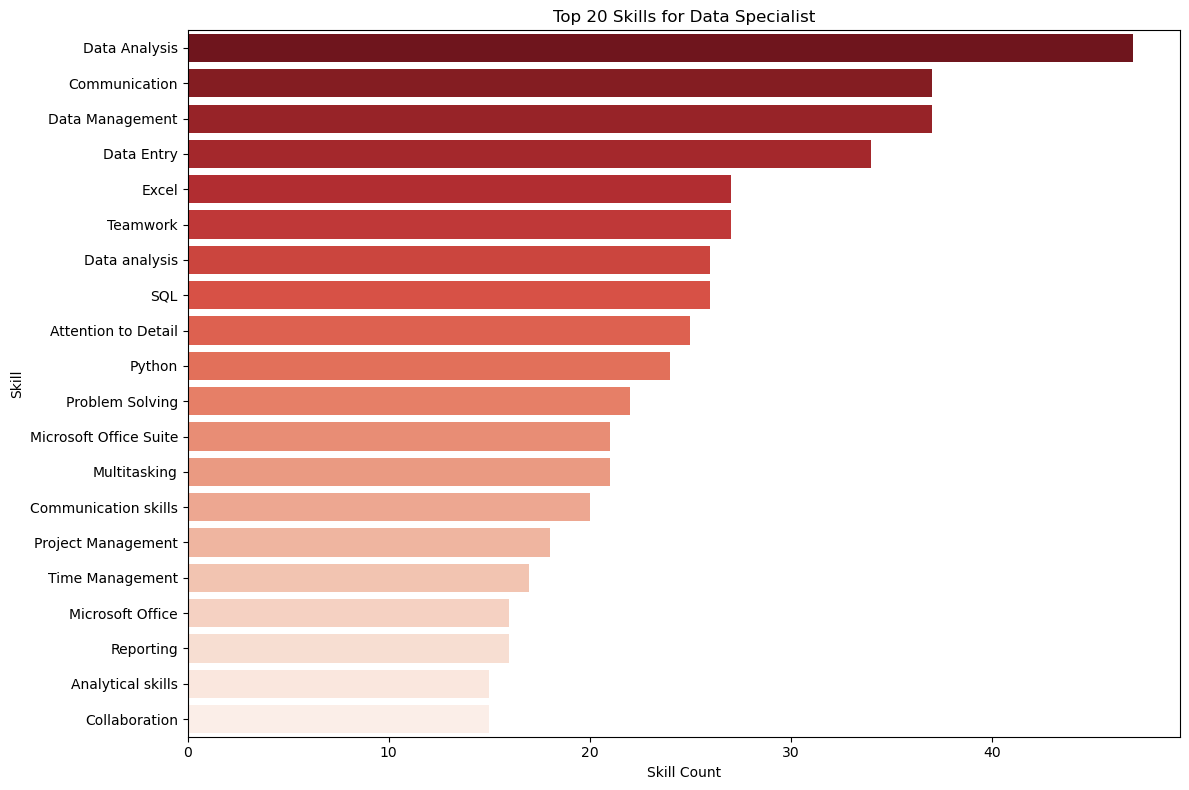

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


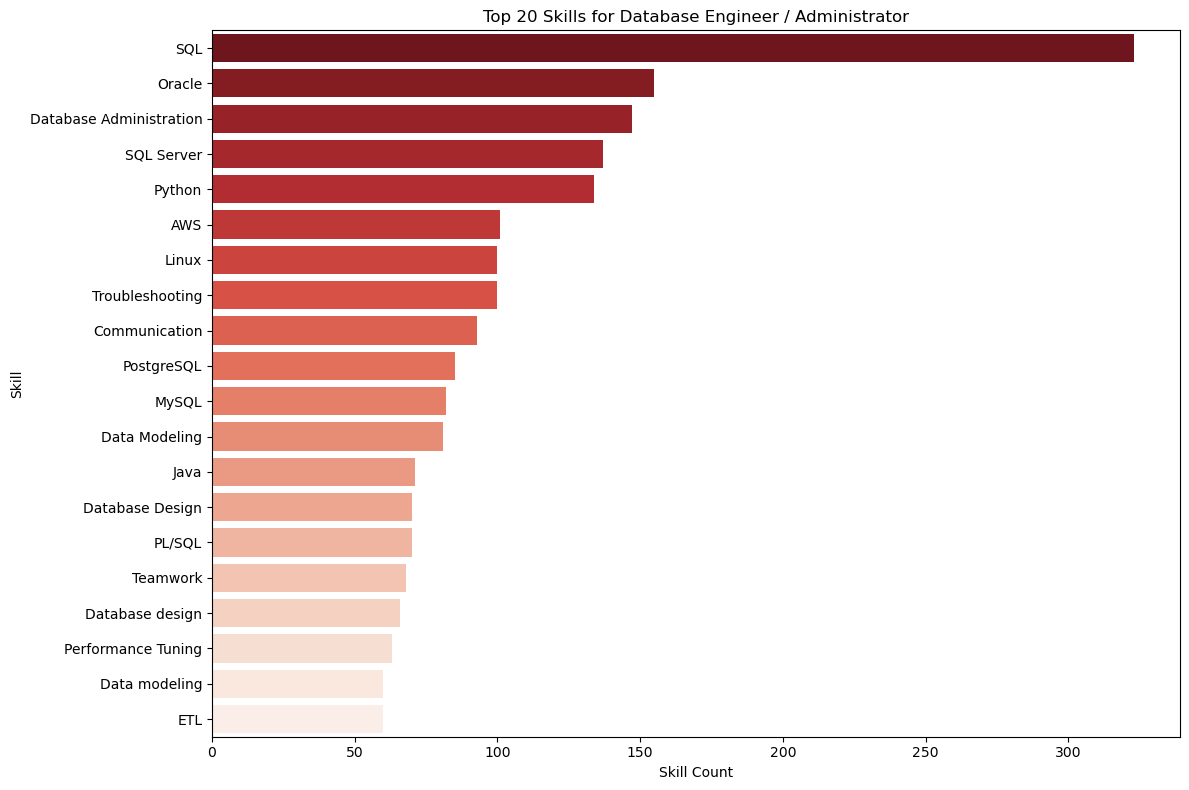

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


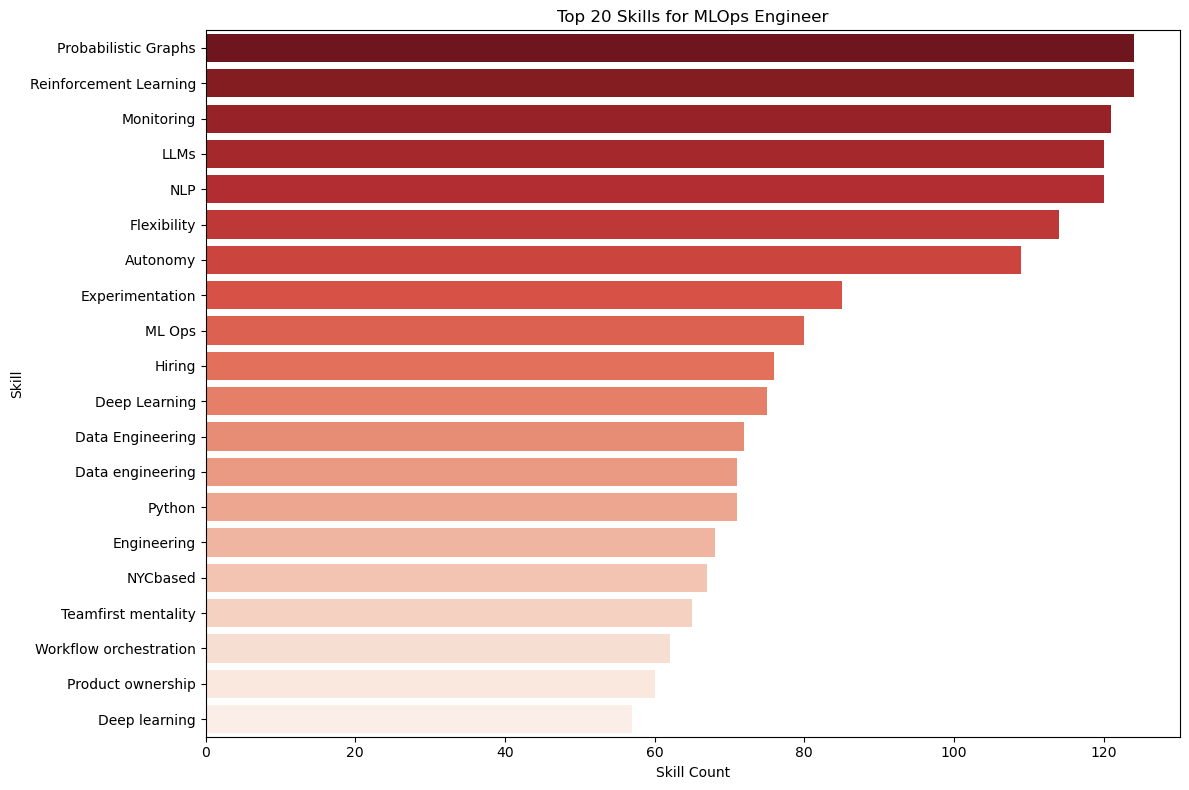

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


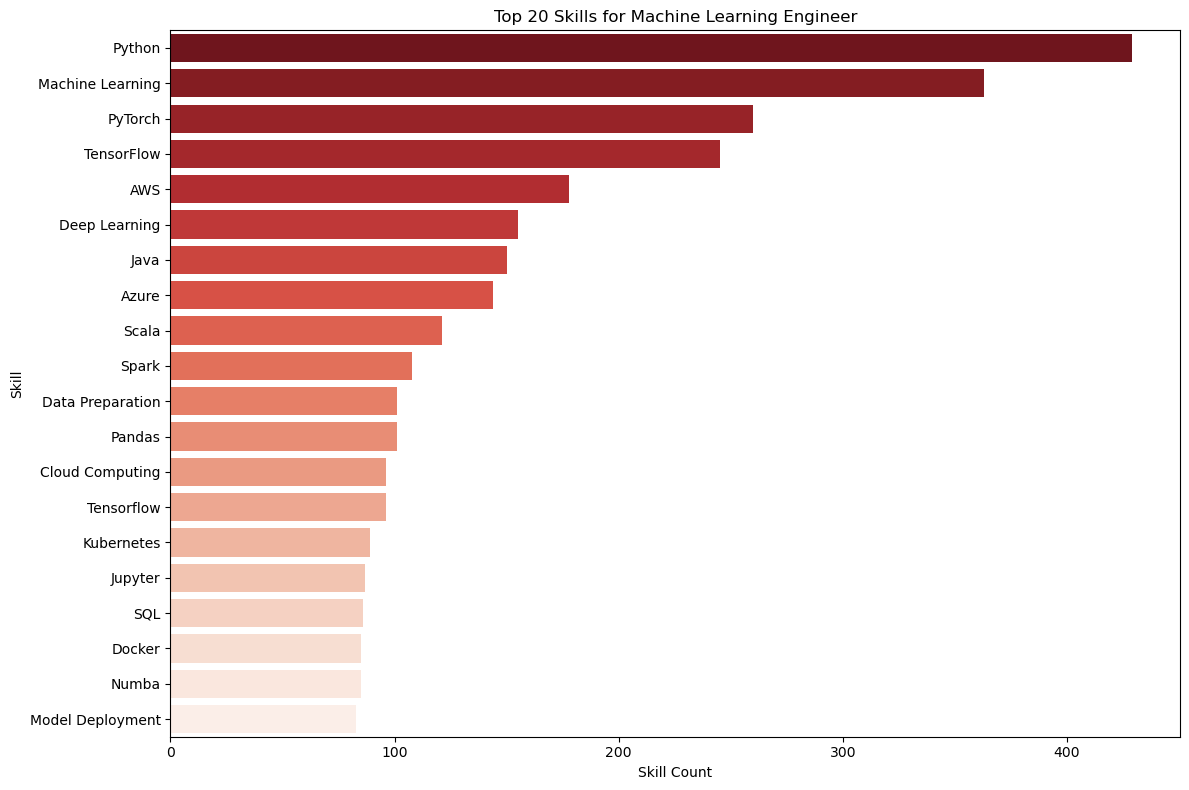

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


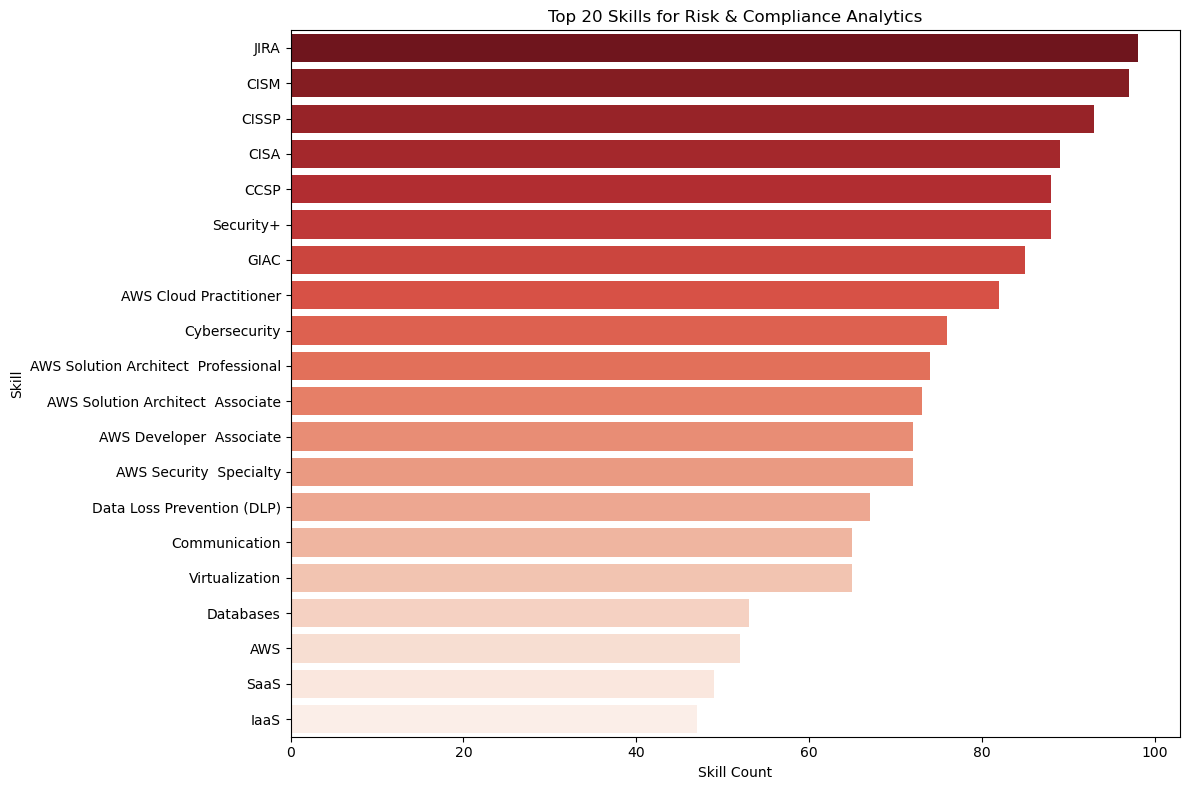

C:\Users\jitra\AppData\Local\Temp\ipykernel_20504\3342259320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')


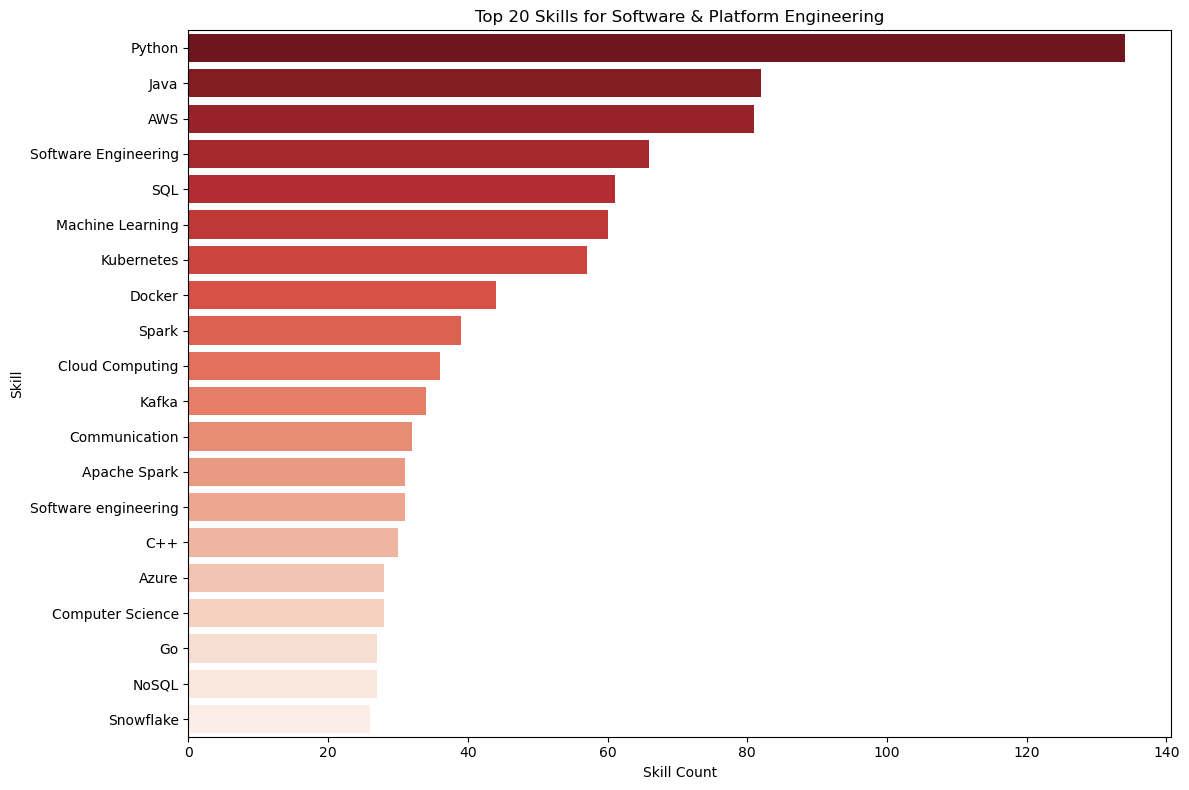

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate through all job classifications and plot top 20 skills for each
for classification in top_skills_per_classification['job_classification'].unique():
    df_to_plot = top_skills_per_classification[top_skills_per_classification['job_classification'] == classification]
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='skill_count', y='job_skills', data=df_to_plot, palette='Reds_r')
    
    plt.xlabel('Skill Count')
    plt.ylabel('Skill')
    plt.title(f'Top 20 Skills for {classification}')
    plt.tight_layout()
    plt.show()

# save figure
plt.savefig('../../../../resources/eda_1.1_top_20_skills_distribution_bar.png')

Now we need to clean up the skills list so that these top 20 summaries are more accurate. There are some visible duplicates (e.g. Data Analysis and Data analysis), and some skills that could be merged.

In [82]:
# Standardize job_skills to lowercase and remove extra spaces
merged_df["job_skills"] = merged_df["job_skills"].str.lower().str.strip()

# Get unique skills sorted alphabetically
unique_skills = sorted(merged_df["job_skills"].dropna().unique())

# Save to a file for review (optional)
pd.DataFrame(unique_skills, columns=["Unique Skills"]).to_csv("unique_skills.csv", index=False)

# Display the first few unique skills
unique_skills[:50]  # Show first 50 skills for manual review



['"show processlist"',
 '"trustworthy ai"',
 '$3040 hourly pay',
 '$44/hr to $48/hr',
 '$45500 $48500 (potentially higher based on work experience)',
 '$5560/hr contracttocontract',
 '$74476.00  $100000.00 annual rate',
 "'big data' data pipelines",
 "'big data' data stores",
 '(deep) neural networks',
 '* 8+ years of experience',
 '* ability to work in the united states',
 '* actionable targets',
 '* agile',
 '* airflow',
 '* algorithm selection',
 '* analytical thinking',
 '* artificial intelligence',
 '* asana',
 '* aws',
 '* azure',
 '* azure cloud services',
 '* azure dev ops',
 '* behaviordriven development',
 '* big data',
 '* biology',
 '* bitbucket',
 '* business intelligence',
 '* business problem modeling',
 '* cassandra',
 '* circleci',
 '* cloud computing',
 '* cloud pipelines',
 '* collaboration',
 '* commercial analytics',
 '* communication',
 '* communication skills',
 '* continuous delivery',
 '* continuous deployment',
 '* continuous integration',
 '* cpg',
 '* dashbo

In [94]:
# Standardize job_skills to lowercase and remove extra spaces
merged_df["job_skills"] = merged_df["job_skills"].str.lower().str.strip()

# Function to dynamically map skills based on keywords
def dynamic_skill_mapping(skill):
    skill = skill.strip()  # Remove leading/trailing spaces (optional)

    # 🎓 Standardizing Education-Related Skills
    if "bachelor of" in skill or "bachelor's" in skill:
        return "Bachelor's Degree"
    if "master of" in skill or "master's" in skill:
        return "Master's Degree"
    if "phd" in skill or "doctorate" in skill or "postdoctorate" in skill or "postdoctoral" in skill:
        return "Phd"
    if "associate degree" in skill or "associate's degree" in skill:
        return "Associate's Degree"

    # ☁️ Grouping AWS Certifications into Categories
    if "aws cloud" in skill or "amazon web service" in skill:
        return "AWS Fundamentals"
    if "developer" in skill and "aws" in skill:
        return "AWS Developer Certifications"
    if "architect" in skill and "aws" in skill:
        return "AWS Architecture Certifications"
    if "devops" in skill and "aws" in skill:
        return "AWS DevOps Certifications"
    if "sysops" in skill and "aws" in skill:
        return "AWS SysOps Administrator"
    if "aws certified data" in skill or "aws bid data" in skill:
        return "AWS Data Analytics Certification"
    
    # 🤖 Standardizing Data Science & Machine Learning Skills
    if "machine learning" in skill or "ml engineer" in skill:
        return "machine learning"
    if "deep learning" in skill:
        return "deep learning"
    if "natural language processing" in skill or "nlp" in skill:
        return "natural language processing"

    # 🔥 Cloud & Infrastructure Skills
    if "azure" in skill:
        return "Microsoft Azure"
    if "gcp" in skill or "google cloud" in skill:
        return "Google Cloud Platform"
    
    # 📊 Business Intelligence & Data Analysis
    if "power bi" in skill:
        return "Power BI"
    if "tableau" in skill:
        return "Tableau"
    if "excel" in skill or "spreadsheet" in skill:
        return "Excel"
    
    # 🖥️ Programming Languages
    if "python" in skill:
        return "Python"
    if "r programming" in skill or skill == "r":
        return "R Programming"
    if "sql" in skill:
        return "SQL"
    if "java" in skill:
        return "Java"
    if "javascript" in skill or "js" in skill:
        return "JavaScript"
    if "c++" in skill or "c plus plus" in skill:
        return "C++"

    # 📂 Databases
    if "postgresql" in skill or "postgre" in skill:
        return "PostgreSQL"
    if "mongodb" in skill:
        return "MongoDB"
    
    if "relational database" in skill:
        return "Relational Databases"
    
    if skill.startswith("aml") or skill.startswith("aml/") or skill.startswith("antimoney"):
        return "AML (Anti-Money Laundering)"
    
    if "apache" in skill:
        return "Apache Suite"
    
    if "application programming" in skill:
        return "Application Programming"
    
    if "application performance" in skill:
        return "Application Performance Analysis/Testing"
    
    if "analytical" in skill:
        return "Analytical Skills"
    
    if "architecture" in skill or "architectural" in skill:
        return "Data Architecture"
        
    if "scrum" in skill:
        return "Agile Scrum"
    
    if "agile methodology" in skill or "agile concepts" in skill or "agile process" in skill:
        return "Agile Methodology"
    
    if "agile delivery" in skill:
        return "Agile Delivery"
    
    if "agile project" in skill: 
        return "Agile Project Management/Development"

    if skill.startswith("ai") or skill.startswith('artificial intelligence') or "responsible ai" in skill or "explainable ai" in skill:
        return "AI"
    
    if skill.startswith("ai/ml"):
        return "AI / Machine Learning"
    
    if skill.startswith('algorithm'):
        return "Algorithms"

    if "automation" in skill or "automatic" in skill:
        return "Process Automation"
   
    if "$" in skill or "hour" in skill or "day" in skill:
        return None
    
    if "relevant" in skill or "related" in skill:
        return None

    if "24/7" in skill or "24x7" in skill:
        return None

    if "401k" in skill or "401(k)" in skill or "retirement" in skill:
        return None   
    
    if "*" in skill:
        return skill[1:].strip()
    
    if "'big data'" in skill:
        return "big data"
    
    if "years experience" in skill or "years of experience" in skill or "years'" in skill or "year of" in skill or "year" in skill or "week" in skill:
        return None
    
    if "a/b" in skill or "'a/b" in skill:
        return "a/b testing"
    
    if "ability" in skill:
        return None
    
    if "budget" in skill:
        return "budgeting"
    
    if "bsa" in skill:
        return "bsa/aml"
    
    if "business" in skill:
        return "business concepts/analysis"
    
    if "data center" in skill:
        return "data centers"
    
    if "data engineering" in skill:
        return "data engineering"
    
    if "data entry" in skill:
        return "data entry"
    
    if "etl" in skill:
        return "ETL"
    
    if "hadoop" in skill:
        return "hadoop"
    
    if "administrative" in skill or"admin" in skill or "administration" in skill:
        return "administrative skills"
    
    if "adobe" in skill:
        return "Adobe"

    if "audit" in skill or "auditing" in skill:
        return "Data Audit"
    
    if skill.startswith("api"):
        return "API Concepts"
    
    if "big data" in skill:
        return "Big Data"
    
    if "biomedical" in skill or "biometric" in skill or "biopharma" in skill or "biotech" in skill:
        return "Biopharma Skills"
    
    if "couldbased" in skill:
        return "Cloud Computing / Cloudbased Data"
    
    if "database management" in skill or "database maintenance" in skill:
        return "Database Management & Maintenance"
    if "database performance" in skill:
        return "Database Performance Monitoring/Evluation/Optimization"
    
    if "problem" in skill or "debug" in skill:
        return "Problem Solving / Troubleshooting"
    
    if "quantitative" in skill: 
        return "Quantitative Skills"
    
    if "query" in skill:
        return "Query Development, Analysis, and Optimization"
    
    if skill.startswith("sap"):
        return "SAP Certifications"
    
    if "scientific" in skill:
        return "Scientific Method"
    
    if "security" in skill:
        return "Security Standards and Principles"
    
    if skill.startswith(".net") or skill.startswith(".net/"):
        return ".Net"
    
    # Default: Return skill as is if no match is found
    return skill

# Apply the dynamic skill mapping function to the unique skills list
cleaned_unique_skills = [dynamic_skill_mapping(skill) for skill in merged_df["job_skills"]]

merged_df["cleaned_job_skills"] = cleaned_unique_skills

final_df = merged_df.drop(columns=["job_skills"])

final_df

# Save cleaned unique skills to a CSV file for review (optional)
final_df.to_csv("../../../data/cleaned_unique_skills.csv", index=False)